XGBoost - Test Classification Report:
              precision    recall  f1-score   support

       blues       0.89      0.89      0.89       200
   classical       0.93      0.97      0.95       199
     country       0.86      0.87      0.86       199
       disco       0.87      0.90      0.89       200
      hiphop       0.92      0.88      0.90       200
        jazz       0.89      0.91      0.90       200
       metal       0.95      0.96      0.95       200
         pop       0.96      0.85      0.90       200
      reggae       0.88      0.90      0.89       200
        rock       0.87      0.88      0.87       200

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998



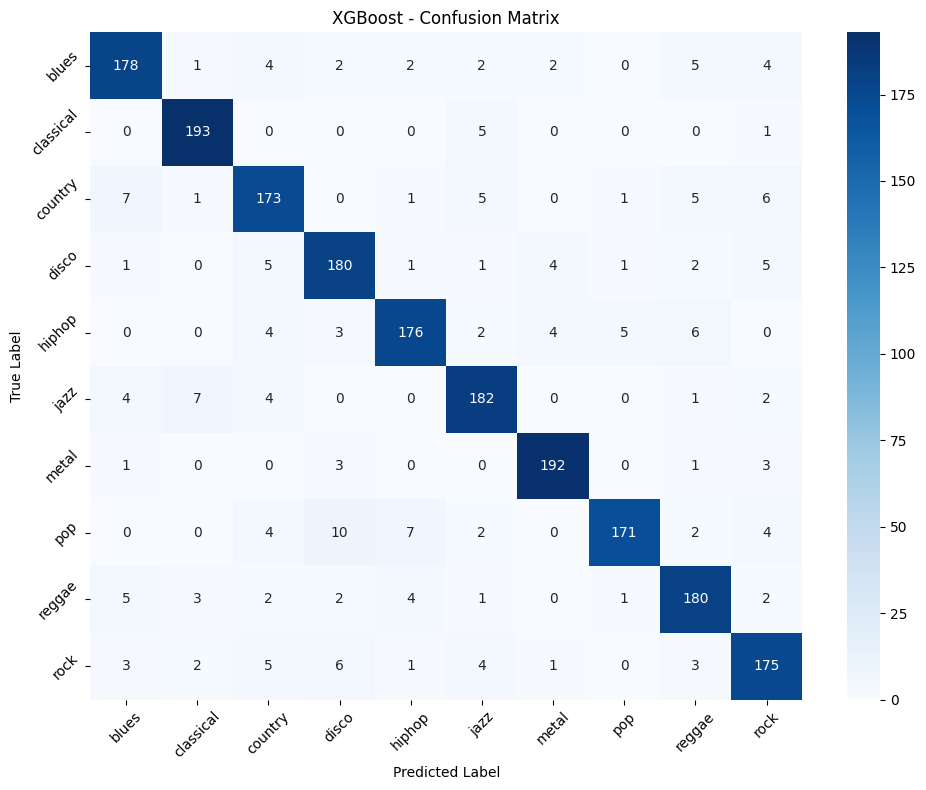

XGBoost - Final Average Precision: 0.9016
XGBoost - Final Average Recall:    0.9009
XGBoost - Final Average F1 Score:  0.9008

SVM - Test Classification Report:
              precision    recall  f1-score   support

       blues       0.92      0.93      0.92       200
   classical       0.96      0.97      0.97       199
     country       0.83      0.88      0.86       199
       disco       0.90      0.91      0.90       200
      hiphop       0.93      0.91      0.92       200
        jazz       0.92      0.95      0.93       200
       metal       0.96      0.96      0.96       200
         pop       0.94      0.88      0.91       200
      reggae       0.91      0.92      0.91       200
        rock       0.92      0.86      0.89       200

    accuracy                           0.92      1998
   macro avg       0.92      0.92      0.92      1998
weighted avg       0.92      0.92      0.92      1998



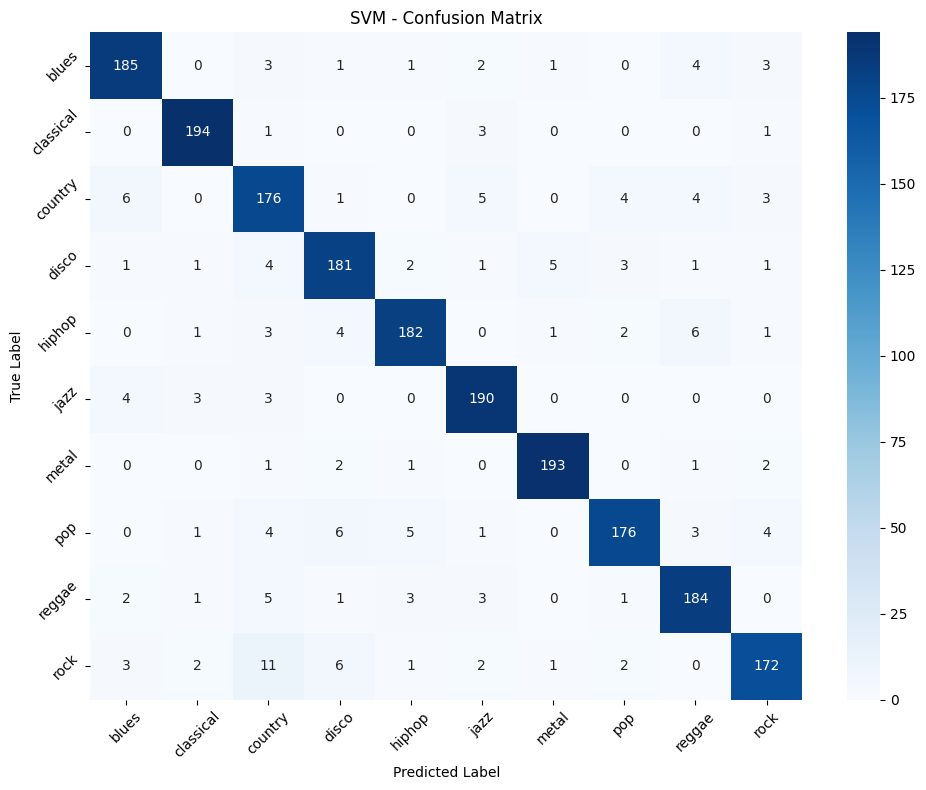

SVM - Final Average Precision: 0.9180
SVM - Final Average Recall:    0.9174
SVM - Final Average F1 Score:  0.9174

KNN - Test Classification Report:
              precision    recall  f1-score   support

       blues       0.87      0.93      0.90       200
   classical       0.89      0.94      0.91       199
     country       0.87      0.83      0.85       199
       disco       0.82      0.93      0.87       200
      hiphop       0.92      0.90      0.91       200
        jazz       0.87      0.88      0.87       200
       metal       0.98      0.94      0.96       200
         pop       0.95      0.82      0.88       200
      reggae       0.86      0.94      0.90       200
        rock       0.89      0.80      0.84       200

    accuracy                           0.89      1998
   macro avg       0.89      0.89      0.89      1998
weighted avg       0.89      0.89      0.89      1998



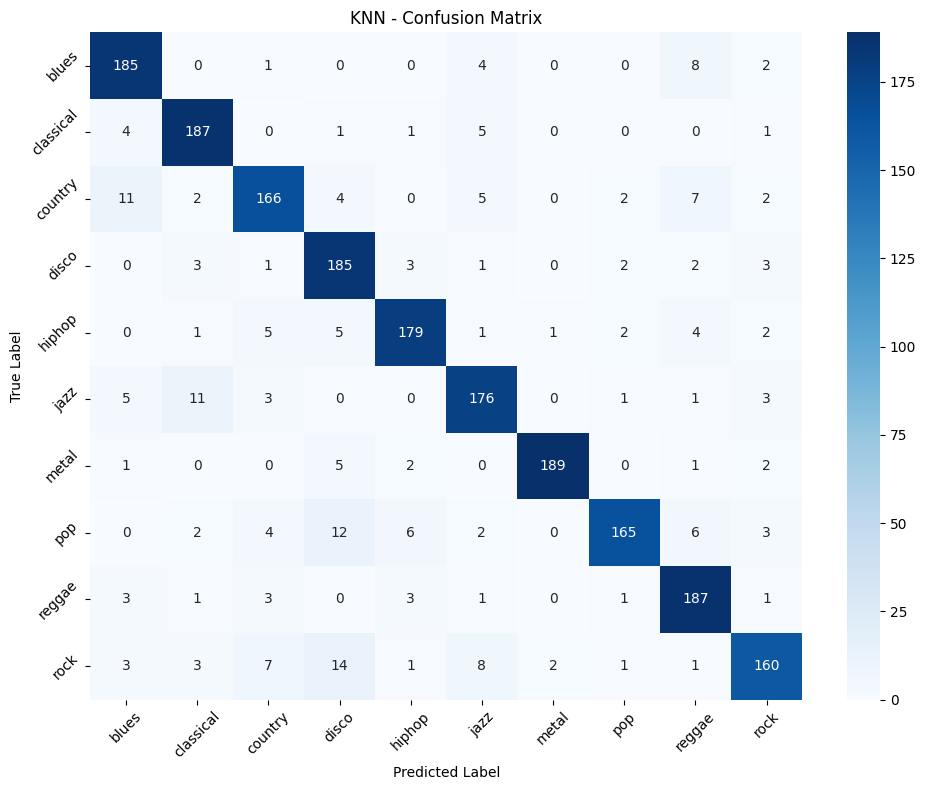

KNN - Final Average Precision: 0.8929
KNN - Final Average Recall:    0.8904
KNN - Final Average F1 Score:  0.8902



In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    X = df.drop(columns=["filename", "length", "label"])
    y = df["label"]

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    selector = VarianceThreshold(threshold=0.01)
    X_high_var = selector.fit_transform(X_scaled)

    return X_high_var, y_encoded, label_encoder

from sklearn.metrics import classification_report, precision_recall_fscore_support

def print_avg_metrics(report_dict, model_name):
    avg = report_dict["weighted avg"]
    print(f"{model_name} - Final Average Precision: {avg['precision']:.4f}")
    print(f"{model_name} - Final Average Recall:    {avg['recall']:.4f}")
    print(f"{model_name} - Final Average F1 Score:  {avg['f1-score']:.4f}\n")

def run_xgboost(X_train, X_test, y_train, y_test, label_encoder):
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    model.fit(X_train, y_train)
    y_pred_xgb = model.predict(X_test)
    report = classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_, output_dict=True)
    print("XGBoost - Test Classification Report:")
    print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))
    plot_confusion_matrix(y_test, y_pred_xgb, label_encoder.classes_, "XGBoost - Confusion Matrix")
    print_avg_metrics(report, "XGBoost")

def run_svm(X_train, X_test, y_train, y_test, label_encoder):
    svm_model = SVC(kernel='rbf', C=100, gamma='scale', random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    report = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_, output_dict=True)
    print("SVM - Test Classification Report:")
    print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))
    plot_confusion_matrix(y_test, y_pred_svm, label_encoder.classes_, "SVM - Confusion Matrix")
    print_avg_metrics(report, "SVM")

def run_knn(X_train, X_test, y_train, y_test, label_encoder):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')  # Keeping weights uniform
    knn_model.fit(X_train_scaled, y_train)

    y_pred_knn = knn_model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_, output_dict=True)
    print("KNN - Test Classification Report:")
    print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))
    plot_confusion_matrix(y_test, y_pred_knn, label_encoder.classes_, "KNN - Confusion Matrix")
    print_avg_metrics(report, "KNN")


if __name__ == "__main__":
    file_path = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv"  # Place this .py file in the same directory as the CSV
    X_high_var, y_encoded, label_encoder = load_and_preprocess_data(file_path)

    # Feature selection using XGBoost
    temp_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    temp_model.fit(X_high_var, y_encoded)
    importances = temp_model.feature_importances_
    top_indices = np.argsort(importances)[-50:]
    X_selected = X_high_var[:, top_indices]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

    # PCA for KNN
    pca = PCA(n_components=30, random_state=42)
    X_pca = pca.fit_transform(X_high_var)

    run_xgboost(X_train, X_test, y_train, y_test, label_encoder)
    run_svm(X_train, X_test, y_train, y_test, label_encoder)
    run_knn(X_train, X_test, y_train, y_test, label_encoder)
